# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
#pip install --upgrade jupyter
!pip install numpy==1.26.4

In [17]:
#pip install matplotlib==3.10.0 -U

In [5]:
!pip install pandas==2.2.2

In [7]:
!pip install matplotlib==3.10.0

In [9]:
!pip install seaborn==0.13.2

In [1]:
import pandas as pd

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
!pip install numpy==1.26.4

In [5]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy==1.26.4"])

0

In [7]:
#!conda install numpy=1.26.4

^C


In [9]:
!pip uninstall -y numpy pandas

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


You can safely remove it manually.


In [11]:
!pip install numpy==1.26.4

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -- ------------------------------------- 1.0/15.5 MB 7.2 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/15.5 MB 5.0 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/15.5 MB 4.4 MB/s eta 0:00:03
   -------- ------------------------------- 3.4/15.5 MB 4.3 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/15.5 MB 4.2 MB/s eta 0:00:03
   ------------ --------------------------- 5.0/15.5 MB 4.2 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.5 MB 4.1 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/15.5 MB 4.1 MB/s eta 0:00:03
   ------------------- -------------------- 7.6/15.5 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 8.4/15.5 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 9.2/15.5 MB 4.0 MB/s eta 0:00:02
   ------------------------- -------------- 10.0/15.5 MB 4.0 MB/s eta 0:00:02
   --

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.0.1 requires pandas>=0.18, which is not installed.
bokeh 3.6.0 requires pandas>=1.2, which is not installed.
datashader 0.16.3 requires pandas, which is not installed.
holoviews 1.19.1 requires pandas>=1.3, which is not installed.
hvplot 0.11.0 requires pandas>=1.3, which is not installed.
panel 1.5.2 requires pandas>=1.2, which is not installed.
seaborn 0.13.2 requires pandas>=1.2, which is not installed.
statsmodels 0.14.2 requires pandas!=2.1.0,>=1.4, which is not installed.
streamlit 1.37.1 requires pandas<3,>=1.3.0, which is not installed.
xarray 2023.6.0 requires pandas>=1.4, which is not installed.


In [13]:
!pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 1.2 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.5 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.5 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.5 MB 1.7 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.5 MB 1.9 MB/s eta 0:00:05
   ----------- ---------------------------- 3.4/11.5 MB 2.3 MB/s eta 0:00:04
   -------------- ------------------------- 4.2/11.5 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.5 MB 2.7 MB/s eta 0:00:03
   -------------------- ------------------- 6.0/11.5 MB 2.9 MB/s eta 0:00:02
   ---------------------- -

In [ ]:
import os
import sys
os.kill(os.getpid(), 9)

In [1]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### 

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

df_hour_1 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-1.parquet")
df_hour_2 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-2.parquet")
df_hour_3 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-3.parquet")
df_hour_4 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-4.parquet")
df_hour_5 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-5.parquet")
df_hour_6 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-6.parquet")
df_hour_7 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-7.parquet")
df_hour_8 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-8.parquet")
df_hour_9 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-9.parquet")
df_hour_10 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-10.parquet")
df_hour_11 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-11.parquet")
df_hour_12 = pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\trip_records\\2023-12.parquet")
df_hour_12.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333925 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

In [10]:
df_hour_12.shape

(3333925, 19)

In [12]:
df_hour_1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [14]:
df_hour_1.tpep_pickup_datetime.unique()
df_hour_1['date']=df_hour_1.tpep_pickup_datetime.dt.day
df_hour_1['hour']=df_hour_1.tpep_pickup_datetime.dt.hour
date_hour_1_sample=df_hour_1.groupby(['date','hour']).sample(frac = 0.05, random_state = 42)
date_hour_1_sample.reset_index(inplace=True)
date_hour_1_sample.groupby('date')['hour'].count()

date
1     3801
2     3253
3     4251
4     4713
5     5014
6     5088
7     5206
8     4218
9     4231
10    4958
11    5268
12    5528
13    5491
14    5596
15    4800
16    3970
17    5011
18    5268
19    5690
20    5428
21    5552
22    4444
23    4454
24    5153
25    5419
26    5701
27    5537
28    5535
29    4372
30    4153
31    4984
Name: hour, dtype: int64

In [16]:
def sampled_data_frame(data_f,sampled_d):
    data_f['date']=data_f.tpep_pickup_datetime.dt.date
    data_f['hour']=data_f.tpep_pickup_datetime.dt.hour
    sampled_d = data_f.groupby(['date','hour']).sample(frac = 0.05, random_state = 42)
    sampled_d.reset_index(drop=True,inplace=True)
    return sampled_d
sampled_d = pd.DataFrame()
df_list = [df_hour_1,df_hour_2]
for data in df_list:
    sam=sampled_data_frame(data,sampled_d)
sam.groupby('date')['hour'].count()

date
2023-02-28       1
2023-03-01    5716
2023-03-02    5900
2023-03-03    5773
2023-03-04    5613
2023-03-05    4805
2023-03-06    4634
2023-03-07    5644
2023-03-08    5825
2023-03-09    6031
2023-03-10    6038
2023-03-11    5517
2023-03-12    4708
2023-03-13    4978
2023-03-14    5339
2023-03-15    5954
2023-03-16    6152
2023-03-17    5575
2023-03-18    6025
2023-03-19    4977
2023-03-20    4532
2023-03-21    5050
2023-03-22    5260
2023-03-23    5659
2023-03-24    5501
2023-03-25    5730
2023-03-26    4663
2023-03-27    4779
2023-03-28    5173
2023-03-29    5517
2023-03-30    5917
2023-03-31    5709
2023-04-01       1
Name: hour, dtype: int64

In [20]:
df_hour_new=df_hour_1.copy()

In [22]:
df_hour_new['date']=df_hour_new.tpep_pickup_datetime.dt.day
df_hour_new['hour']=df_hour_new.tpep_pickup_datetime.dt.hour
date_time_value=df_hour_new.groupby(['date','hour']).sample(frac = 0.05, random_state = 42)
#df_hour_new_1=df_hour_new.query("hour >= 0 and hour < 1 ")
#df_hour_new_1.hour.unique()
#date_time_value=df_hour_new_1.groupby('date').sample(frac = 0.05, random_state = 42)
date_time_value.shape
date_time_value.reset_index(drop=True,inplace=True)
date_time_value.head()
#date_time_value.groupby('date')['hour'].count()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour
0,2,2023-01-01 00:31:50,2023-01-01 00:44:17,2.0,2.85,1.0,N,263,41,1,...,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0,1,0
1,2,2023-01-01 00:10:50,2023-01-01 00:24:12,4.0,1.32,1.0,N,90,137,1,...,1.0,0.5,3.56,0.0,1.0,21.36,2.5,0.0,1,0
2,2,2023-01-01 00:25:37,2023-01-01 00:34:52,1.0,3.17,1.0,N,79,141,1,...,1.0,0.5,3.98,0.0,1.0,23.88,2.5,0.0,1,0
3,2,2023-01-01 00:27:26,2023-01-01 00:52:20,2.0,3.80,1.0,N,142,107,2,...,1.0,0.5,0.00,0.0,1.0,29.70,2.5,0.0,1,0
4,2,2023-01-01 00:59:15,2023-01-01 01:23:15,NaN,7.97,NaN,None,140,17,0,...,0.0,0.5,8.17,0.0,1.0,49.00,NaN,NaN,1,0


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir("C:\\Users\\Hardik\\Documents\\nyctaxi\\date_trip")

# Create a list of all the twelve files to read
file_list = os.listdir()
# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_read=pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        df_read['date']=df_read.tpep_pickup_datetime.dt.date
        df_read['hour']=df_read.tpep_pickup_datetime.dt.hour
        sampled_data=df_read.groupby(['date','hour']).sample(frac = 0.05, random_state = 42)
        # Loop through dates and then loop through every hour of each date
            # Iterate through each hour of the selected date
        # Sample 5% of the hourly data randomly
                # add data of this hour to the dataframe
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data], axis=0)# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [25]:
df.shape

(1896400, 22)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [28]:
# Store the df in csv/parquet
df.to_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\output1.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [30]:
# Load the new data file

df=pd.read_parquet("C:\\Users\\Hardik\\Documents\\nyctaxi\\output1.parquet")

In [32]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
8048,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,0.5,3.00,0.0,1.0,18.00,2.5,0.0,2022-12-31,23,NaN
2995107,1,2023-01-01 00:59:47,2023-01-01 01:23:42,NaN,0.00,NaN,None,68,45,0,...,0.5,0.00,0.0,1.0,39.30,NaN,NaN,2023-01-01,0,NaN
1013,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.5,0.00,0.0,1.0,12.20,2.5,0.0,2023-01-01,0,NaN
3738,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,0.5,3.05,0.0,1.0,15.25,2.5,0.0,2023-01-01,0,NaN
1985,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,0.5,4.60,0.0,1.0,23.10,2.5,0.0,2023-01-01,0,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 8048 to 2706381
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True,inplace=True)
df.drop(['date','hour'],axis=1,inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0,NaN
1,1,2023-01-01 00:59:47,2023-01-01 01:23:42,NaN,0.00,NaN,None,68,45,0,35.3,0.0,0.5,0.00,0.0,1.0,39.30,NaN,NaN,NaN
2,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0,NaN
3,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0,NaN
4,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
# Combine the two airport fee columns
df['AirportFee']=df['airport_fee'].fillna(0) + df['Airport_fee'].fillna(0)
df.drop(columns=['airport_fee','Airport_fee'],inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2023-01-01 00:59:47,2023-01-01 01:23:42,NaN,0.00,NaN,None,68,45,0,35.3,0.0,0.5,0.00,0.0,1.0,39.30,NaN,0.0
2,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
3,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0
4,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [43]:
# check where values of fare amount are negative
negative_total=df[df['total_amount'] < 0]
negative_total.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
4506,2,2023-01-02 11:03:12,2023-01-02 11:05:47,1.0,0.01,2.0,N,186,186,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
24151,2,2023-01-06 17:31:12,2023-01-06 17:31:27,2.0,0.00,2.0,N,162,162,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
32924,2,2023-01-08 12:52:35,2023-01-08 12:57:55,1.0,0.00,2.0,N,236,236,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
44735,2,2023-01-11 00:00:21,2023-01-11 00:00:34,1.0,0.00,1.0,N,263,263,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
50106,2,2023-01-12 01:38:33,2023-01-12 01:52:07,1.0,2.96,1.0,N,138,138,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-2.75,0.0,-1.25


Did you notice something different in the `RatecodeID` column for above records?

In [46]:
# Analyse RatecodeID for the negative fare amounts

negative_total['RatecodeID'].value_counts()

RatecodeID
1.0    52
2.0    27
5.0     6
3.0     2
4.0     1
Name: count, dtype: int64

In [48]:
# Find which columns have negative values

result = df.select_dtypes(include='number').columns
result

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'AirportFee'],
      dtype='object')

In [50]:
negative_columns = df[result].columns[(df[result] < 0).any()].tolist()
print(negative_columns)
df[negative_columns].min()

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'AirportFee']


extra                   -2.50
mta_tax                 -0.50
improvement_surcharge   -1.00
total_amount            -6.50
congestion_surcharge    -2.50
AirportFee              -1.75
dtype: float64

In [52]:
# fix these negative values
#df_copy=df.copy()
df[df[negative_columns] < 0]=0
df[negative_columns].min()

extra                    0.0
mta_tax                  0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
AirportFee               0.0
dtype: float64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [55]:
# Find the proportion of missing values in each column
df.isnull().mean()*100

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.42549
trip_distance            0.00000
RatecodeID               3.42549
store_and_fwd_flag       3.42549
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.42549
AirportFee               0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [58]:
# Display the rows with null values
df[df.passenger_count.isna()]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
1,1,2023-01-01 00:59:47,2023-01-01 01:23:42,NaN,0.00,NaN,None,68,45,0,35.30,0.0,0.5,0.00,0.00,1.0,39.30,NaN,0.0
8,1,2023-01-01 00:57:48,2023-01-01 01:12:34,NaN,0.00,NaN,None,237,263,0,12.00,1.0,0.5,2.55,0.00,1.0,21.55,NaN,0.0
18,2,2023-01-01 00:39:50,2023-01-01 00:54:29,NaN,7.53,NaN,None,213,7,0,30.97,0.0,0.5,4.00,6.55,1.0,43.02,NaN,0.0
40,2,2023-01-01 00:43:19,2023-01-01 01:03:29,NaN,4.41,NaN,None,211,181,0,24.27,0.0,0.5,5.65,0.00,1.0,33.92,NaN,0.0
42,2,2023-01-01 00:54:30,2023-01-01 01:07:49,NaN,2.91,NaN,None,170,142,0,20.33,0.0,0.5,4.87,0.00,1.0,29.20,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896307,1,2023-09-30 23:04:36,2023-09-30 23:24:55,NaN,0.00,NaN,None,181,36,0,26.10,0.0,0.5,0.00,0.00,1.0,27.60,NaN,0.0
1896324,1,2023-09-30 23:45:00,2023-10-01 00:01:55,NaN,0.00,NaN,None,90,50,0,21.03,0.0,0.5,0.00,0.00,1.0,25.03,NaN,0.0
1896364,1,2023-09-30 23:06:26,2023-09-30 23:24:40,NaN,0.00,NaN,None,87,186,0,25.80,0.0,0.5,0.00,0.00,1.0,29.80,NaN,0.0
1896372,2,2023-09-30 23:46:01,2023-10-01 00:02:31,NaN,3.05,NaN,None,239,68,0,18.47,0.0,0.5,0.00,0.00,1.0,22.47,NaN,0.0


In [60]:
# Impute NaN values in 'passenger_count'
passenger_count=df['passenger_count'].mode()[0]
passenger_count
df['passenger_count']=df['passenger_count'].fillna(passenger_count)
df.head()
df.isnull().mean()*100

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          0.00000
trip_distance            0.00000
RatecodeID               3.42549
store_and_fwd_flag       3.42549
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.42549
AirportFee               0.00000
dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [62]:
df.passenger_count.describe()
df.passenger_count.value_counts(normalize=True)

passenger_count
1.0    0.760791
2.0    0.145905
3.0    0.036286
4.0    0.020643
0.0    0.015420
5.0    0.012710
6.0    0.008235
8.0    0.000005
7.0    0.000003
9.0    0.000001
Name: proportion, dtype: float64

In [64]:
df.passenger_count=df.passenger_count.replace(0,1)
df.passenger_count.value_counts(normalize=True)

passenger_count
1.0    0.776211
2.0    0.145905
3.0    0.036286
4.0    0.020643
5.0    0.012710
6.0    0.008235
8.0    0.000005
7.0    0.000003
9.0    0.000001
Name: proportion, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [66]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.value_counts(normalize=True)
rate_m=df.RatecodeID.mode()[0]
rate_m
df['RatecodeID']=df['RatecodeID'].fillna(rate_m)
df.head()
df.RatecodeID.describe()

count    1.896400e+06
mean     1.626876e+00
std      7.353538e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [68]:
# handle null values in congestion_surcharge
df.congestion_surcharge.value_counts(normalize=True)
df.congestion_surcharge.describe()
df.congestion_surcharge.mean()
congestion_m=df.congestion_surcharge.median()
df.congestion_surcharge=df.congestion_surcharge.fillna(congestion_m)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2023-01-01 00:59:47,2023-01-01 01:23:42,1.0,0.00,1.0,None,68,45,0,35.3,0.0,0.5,0.00,0.0,1.0,39.30,2.5,0.0
2,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
3,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0
4,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0


In [70]:
df.congestion_surcharge.describe()

count    1.896400e+06
mean     2.314765e+00
std      6.548100e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.500000e+00
Name: congestion_surcharge, dtype: float64

In [72]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag       64961
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
AirportFee                   0
dtype: int64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [74]:
# Handle any remaining missing values
df.store_and_fwd_flag.value_counts(normalize=True)
df.store_and_fwd_flag=df.store_and_fwd_flag.fillna('N')
df.store_and_fwd_flag.value_counts(normalize=True)
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
AirportFee               0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [76]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()
#trip distance , ratecodeID, fare_amount,tip_amount,tolls_amount,total_amount

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.735933e+00,2023-07-02 19:59:52.252299,2023-07-02 20:17:19.694492,1.372487e+00,3.966358e+00,1.626876e+00,1.652374e+02,1.640294e+02,1.163460e+00,1.990621e+01,1.583207e+00,4.952690e-01,3.557074e+00,5.998480e-01,9.990559e-01,2.898531e+01,2.314765e+00,1.388072e-01
min,1.000000e+00,2022-12-31 23:36:04,2022-12-31 23:43:31,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:11:35.750000,2023-04-02 16:33:11.750000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:46:22,2023-06-27 16:08:19,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:51,2023-10-06 19:56:09.750000,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.250000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:56:33,2024-01-01 13:29:31,9.000000e+00,1.439264e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.116700e+03,9.638000e+01,5.750000e+00,4.100000e+02,8.355000e+01,1.000000e+00,1.120700e+03,2.500000e+00,1.750000e+00
std,4.465162e-01,NaN,NaN,8.647379e-01,1.713594e+02,7.353538e+00,6.398685e+01,6.987281e+01,5.077709e-01,1.836839e+01,1.830704e+00,4.895950e-02,4.085411e+00,2.186720e+00,2.854502e-02,2.295057e+01,6.548100e-01,4.586914e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [78]:
# remove passenger_count > 6
index_name=df[df.passenger_count > 6].index
df.drop(index_name,inplace=True)
df[df.passenger_count > 6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [80]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
index_name_1=df[(df.trip_distance==0) & (df.fare_amount > 300)].index
df.drop(index_name_1,inplace=True)
df[(df.trip_distance==0) & (df.fare_amount > 300)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [82]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
index_name_2=df[(df.trip_distance==0) & (df.fare_amount==0) & (df.PULocationID != df.DOLocationID)].index
df.drop(index_name_2,inplace=True)
df[(df.trip_distance==0) & (df.fare_amount==0) & (df.PULocationID != df.DOLocationID)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [84]:
#Entries where trip_distance is more than 250 miles.
index_name_3=df[df.trip_distance > 250].index
df.drop(index_name_3,inplace=True)
df[df.trip_distance > 250]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [86]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
index_name_4=df[df.payment_type==0].index
df.drop(index_name_4,inplace=True)
df[df.payment_type==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [88]:
# Do any columns need standardising?
## Removing RatecodeID 99 with 1
df.RatecodeID=df.RatecodeID.replace(99,1)
df[df.RatecodeID==99]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [90]:
## Tip amount
index_value_5=df[df.tip_amount > 100].index
index_value_5
df.drop(index_value_5,inplace=True)
df[df.tip_amount > 100]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee


In [92]:
df[df.tolls_amount > 50] # doestnot need to drop

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
200653,2,2023-10-10 08:57:36,2023-10-10 10:05:48,3.0,51.92,3.0,N,132,265,1,207.1,0.0,0.0,20.00,55.69,1.0,285.54,0.0,1.75
223295,1,2023-10-13 22:42:55,2023-10-13 22:43:10,1.0,0.00,1.0,N,142,143,1,3.0,3.5,0.5,17.60,80.00,1.0,105.60,2.5,0.00
498634,1,2023-12-02 03:57:53,2023-12-02 04:37:22,1.0,15.40,1.0,N,230,29,3,61.1,3.5,0.5,0.00,73.78,1.0,139.88,2.5,0.00
544544,2,2023-12-09 18:06:14,2023-12-09 18:53:41,1.0,14.82,3.0,N,125,1,1,88.1,0.0,0.0,28.47,53.25,1.0,170.82,0.0,0.00
691513,1,2023-03-07 09:42:00,2023-03-07 09:47:07,3.0,0.70,1.0,N,166,166,1,6.5,0.0,0.5,18.00,82.00,1.0,108.00,0.0,0.00
762890,1,2023-03-19 21:41:30,2023-03-19 21:41:51,1.0,0.00,1.0,N,142,142,1,3.0,3.5,0.5,5.00,58.00,1.0,71.00,2.5,0.00
786433,1,2023-03-24 15:08:50,2023-03-24 15:09:03,1.0,0.00,1.0,N,230,230,1,3.0,2.5,0.5,12.00,56.30,1.0,75.30,2.5,0.00
789216,1,2023-03-24 23:31:22,2023-03-24 23:31:44,1.0,0.00,1.0,N,237,141,3,3.0,3.5,0.5,0.00,75.75,1.0,83.75,2.5,0.00
789227,1,2023-03-24 23:58:31,2023-03-25 00:11:21,1.0,1.90,1.0,N,162,142,1,12.1,3.5,0.5,10.00,80.00,1.0,107.10,2.5,0.00
895216,2,2023-06-13 09:10:28,2023-06-13 10:30:58,1.0,53.02,4.0,N,132,265,1,268.3,0.0,0.0,20.00,51.30,1.0,342.35,0.0,1.75


In [660]:
df[df.total_amount > 500]  # first row seems to be incorrect i think near to zero we should add need to recheck this

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
76451,2,2023-01-17 10:04:34,2023-01-17 10:05:00,1.0,0.06,5.0,N,141,74,4,600.0,0.00,0.0,0.0,0.00,1.0,603.50,2.5,0.00
157347,2,2023-10-02 03:28:48,2023-10-02 05:01:39,1.0,85.37,4.0,N,132,265,2,576.3,1.00,0.5,0.0,19.69,1.0,600.24,0.0,1.75
201243,2,2023-10-10 10:26:05,2023-10-10 15:35:57,2.0,164.66,1.0,N,169,265,2,596.6,0.00,0.0,0.0,12.75,1.0,610.35,0.0,0.00
379827,2,2023-11-10 00:14:42,2023-11-10 01:56:53,1.0,136.48,4.0,N,132,265,2,616.9,1.00,0.0,0.0,6.94,1.0,627.59,0.0,1.75
743877,2,2023-03-16 16:34:17,2023-03-16 19:50:26,1.0,168.53,5.0,N,132,265,2,600.0,0.00,0.0,0.0,0.00,1.0,602.25,0.0,1.25
821619,2,2023-03-31 06:43:25,2023-03-31 08:29:57,1.0,84.77,4.0,N,132,265,2,493.0,0.00,0.5,0.0,21.30,1.0,517.05,0.0,1.25
830206,2,2023-06-01 16:00:51,2023-06-01 19:16:31,1.0,79.17,4.0,N,132,265,2,525.9,2.50,0.0,0.0,6.55,1.0,535.95,0.0,0.00
986972,2,2023-06-30 10:12:47,2023-06-30 12:03:03,1.0,83.69,4.0,N,138,265,4,549.7,5.00,0.0,0.0,19.30,1.0,576.75,0.0,1.75
1019543,2,2023-08-07 09:12:21,2023-08-07 12:51:34,4.0,125.12,4.0,N,132,265,2,824.8,0.00,0.0,0.0,6.55,1.0,834.10,0.0,1.75
1105342,2,2023-08-26 10:31:13,2023-08-26 13:32:16,5.0,119.64,4.0,N,132,265,2,778.6,0.00,0.0,0.0,17.20,1.0,798.55,0.0,1.75


In [94]:
df_outlier = df.copy() # will further do analysis on df_outlier

In [96]:
df_outlier.reset_index(drop=True,inplace=True)
df_outlier.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [98]:
column_list=df_outlier.columns.tolist()
column_list
df_outlier.info()
df_outlier['pickup_hour']=df_outlier['tpep_pickup_datetime'].dt.hour
df_outlier.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831265 entries, 0 to 1831264
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  AirportFee            

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,10.0,1.0,0.5,3.00,0.0,1.0,18.00,2.5,0.0,23
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,7.2,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0,0
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,7.2,1.0,0.5,3.05,0.0,1.0,15.25,2.5,0.0,0
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,13.5,3.5,0.5,4.60,0.0,1.0,23.10,2.5,0.0,0
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,18.4,1.0,0.5,4.68,0.0,1.0,28.08,2.5,0.0,0


#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: N
* `tpep_pickup_datetime`: D
* `tpep_dropoff_datetime`: D
* `passenger_count`: N
* `trip_distance`: N
* `RatecodeID`: N
* `PULocationID`: N
* `DOLocationID`:N
* `payment_type`: N
* `pickup_hour`: N
* `trip_duration`: N


The following monetary parameters belong in the same category, is it categorical or numerical? -> numerical

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [100]:
#pip install -I matplotlib

([<matplotlib.axis.XTick at 0x29a834c4530>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

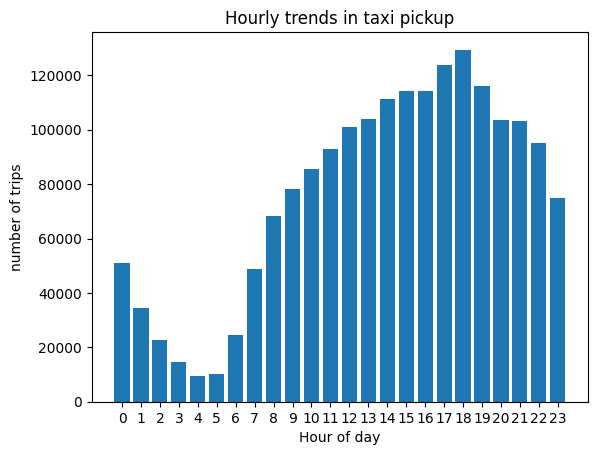

In [106]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns
hour_count=df_outlier.pickup_hour.value_counts().sort_index()
ind=hour_count.index
val=hour_count.values
val
#plt.figure(figsize=(10,6))
plt.bar(ind,val)
plt.xlabel("Hour of day")
plt.ylabel("number of trips")
plt.title("Hourly trends in taxi pickup")
plt.xticks(range(0, 24))

([<matplotlib.axis.XTick at 0x29af6e6acc0>,
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

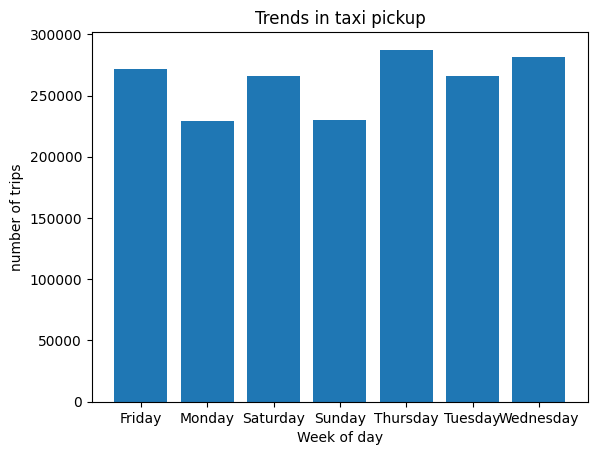

In [110]:
# Find and show the daily trends in taxi pickups (days of the week)
df_outlier["day_of_week"] = df_outlier["tpep_pickup_datetime"].dt.day_name()
df_outlier.head()
week_count=df_outlier.day_of_week.value_counts().sort_index()
ind=week_count.index
val=week_count.values
val
#plt.figure(figsize=(10,6))
plt.bar(ind,val)
plt.xlabel("Week of day")
plt.ylabel("number of trips")
plt.title("Trends in taxi pickup")
plt.xticks(range(0, 7))

([<matplotlib.axis.XTick at 0x29ae14d2510>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

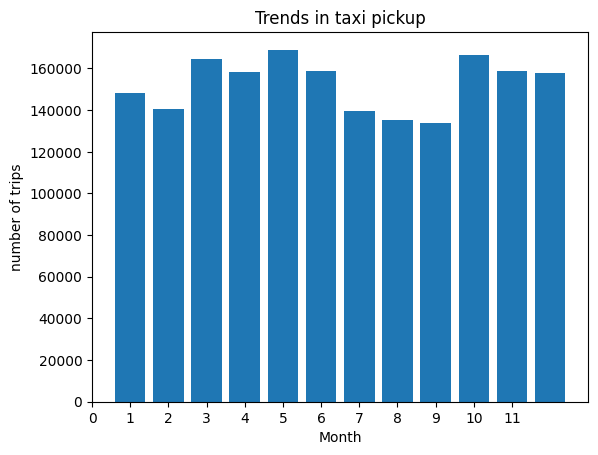

In [116]:
# Show the monthly trends in pickups
df_outlier['month']= df_outlier["tpep_pickup_datetime"].dt.month
df_outlier.head()
month_count=df_outlier.month.value_counts().sort_index()
ind=month_count.index
val=month_count.values
val
#plt.figure(figsize=(10,6))
plt.bar(ind,val)
plt.xlabel("Month")
plt.ylabel("number of trips")
plt.title("Trends in taxi pickup")
plt.xticks(range(0, 12))

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [124]:
# Analyse the above parameters

df_outlier[df_outlier.fare_amount<=0]
df_outlier[df_outlier.tip_amount<=0]
df_outlier[df_outlier.total_amount<=0]
df_outlier[df_outlier.trip_distance<=0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month
152,1,2023-01-01 00:45:06,2023-01-01 00:54:06,1.0,0.0,1.0,N,48,48,2,...,0.5,0.00,0.0,1.0,13.60,2.5,0.00,0,Sunday,1
263,2,2023-01-01 01:23:27,2023-01-01 01:23:39,1.0,0.0,5.0,N,263,263,1,...,0.0,1.00,0.0,1.0,16.50,2.5,0.00,1,Sunday,1
267,2,2023-01-01 01:52:06,2023-01-01 01:52:58,1.0,0.0,3.0,N,264,264,1,...,0.0,2.00,0.0,1.0,27.00,0.0,0.00,1,Sunday,1
395,2,2023-01-01 01:42:36,2023-01-01 01:42:41,1.0,0.0,1.0,N,142,142,3,...,0.5,0.00,0.0,1.0,8.00,2.5,0.00,1,Sunday,1
421,2,2023-01-01 01:22:28,2023-01-01 01:23:31,2.0,0.0,1.0,N,239,239,2,...,0.5,0.00,0.0,1.0,8.00,2.5,0.00,1,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1830666,2,2023-09-30 22:06:31,2023-09-30 22:06:51,1.0,0.0,1.0,N,132,132,4,...,0.5,0.00,0.0,1.0,7.25,0.0,1.75,22,Saturday,9
1830725,2,2023-09-30 22:45:32,2023-09-30 23:01:37,5.0,0.0,1.0,N,249,170,1,...,0.5,2.00,0.0,1.0,21.20,2.5,0.00,22,Saturday,9
1830850,1,2023-09-30 22:54:17,2023-09-30 22:54:17,2.0,0.0,1.0,Y,230,264,2,...,0.5,0.00,0.0,1.0,12.20,2.5,0.00,22,Saturday,9
1831173,2,2023-09-30 23:20:33,2023-09-30 23:30:33,1.0,0.0,1.0,N,48,68,1,...,0.5,2.86,0.0,1.0,17.16,2.5,0.00,23,Saturday,9


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [128]:
# Create a df with non zero entries for the selected parameters.
df_non_zero=df_outlier.copy()
df_non_zero.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,0.5,3.00,0.0,1.0,18.00,2.5,0.0,23,Saturday,12
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.5,0.00,0.0,1.0,12.20,2.5,0.0,0,Sunday,1
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,0.5,3.05,0.0,1.0,15.25,2.5,0.0,0,Sunday,1
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,0.5,4.60,0.0,1.0,23.10,2.5,0.0,0,Sunday,1
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,0.5,4.68,0.0,1.0,28.08,2.5,0.0,0,Sunday,1


In [136]:
# Create a df with non zero entries for the selected parameters.
df_nz_sampled=df_non_zero[df_non_zero.PULocationID != df_non_zero.DOLocationID]
df_nz_sampled

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,0.5,3.00,0.0,1.0,18.00,2.5,0.0,23,Saturday,12
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.5,0.00,0.0,1.0,12.20,2.5,0.0,0,Sunday,1
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,0.5,3.05,0.0,1.0,15.25,2.5,0.0,0,Sunday,1
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,0.5,4.60,0.0,1.0,23.10,2.5,0.0,0,Sunday,1
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,0.5,4.68,0.0,1.0,28.08,2.5,0.0,0,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831259,2,2023-09-30 23:34:59,2023-09-30 23:48:00,2.0,1.30,1.0,N,234,249,1,...,0.5,3.56,0.0,1.0,21.36,2.5,0.0,23,Saturday,9
1831260,2,2023-09-30 23:51:38,2023-09-30 23:53:08,1.0,0.46,1.0,N,239,238,2,...,0.5,0.00,0.0,1.0,9.40,2.5,0.0,23,Saturday,9
1831261,2,2023-09-30 23:14:40,2023-09-30 23:35:31,1.0,2.80,1.0,N,249,50,1,...,0.5,2.00,0.0,1.0,26.10,2.5,0.0,23,Saturday,9
1831262,2,2023-09-30 23:23:52,2023-09-30 23:50:41,1.0,5.68,1.0,N,164,256,1,...,0.5,6.78,0.0,1.0,40.68,2.5,0.0,23,Saturday,9


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

([<matplotlib.axis.XTick at 0x29b04d4b290>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

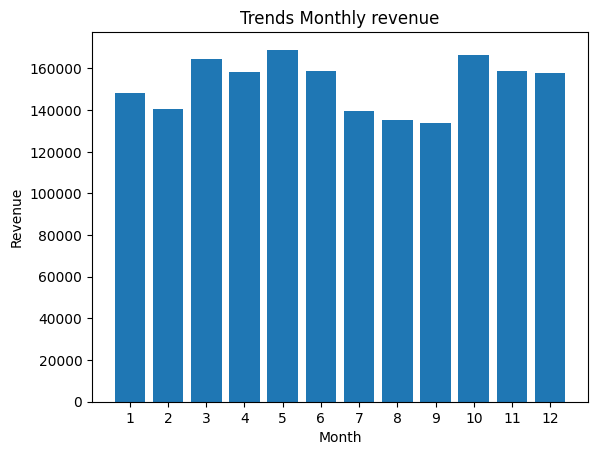

In [151]:
# Group data by month and analyse monthly revenue
month_revenue=df_nz_sampled.groupby('month')['total_amount'].sum()
month_count=df_outlier.month.value_counts().sort_index()
ind=month_count.index
val=month_count.values
val
#plt.figure(figsize=(10,6))
plt.bar(ind,val)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Trends Monthly revenue")
plt.xticks(range(1, 13))

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [155]:
# Calculate proportion of each quarter
df_nz_sampled['quarter']=df_nz_sampled.tpep_pickup_datetime.dt.quarter
df_nz_sampled.head()

C:\Users\Hardik\AppData\Local\Temp\ipykernel_4188\2970913417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz_sampled['quarter']=df_nz_sampled.tpep_pickup_datetime.dt.quarter


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month,quarter
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,3.00,0.0,1.0,18.00,2.5,0.0,23,Saturday,12,4
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.00,0.0,1.0,12.20,2.5,0.0,0,Sunday,1,1
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,3.05,0.0,1.0,15.25,2.5,0.0,0,Sunday,1,1
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,4.60,0.0,1.0,23.10,2.5,0.0,0,Sunday,1,1
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,4.68,0.0,1.0,28.08,2.5,0.0,0,Sunday,1,1


([<matplotlib.axis.XTick at 0x29b1248fe30>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

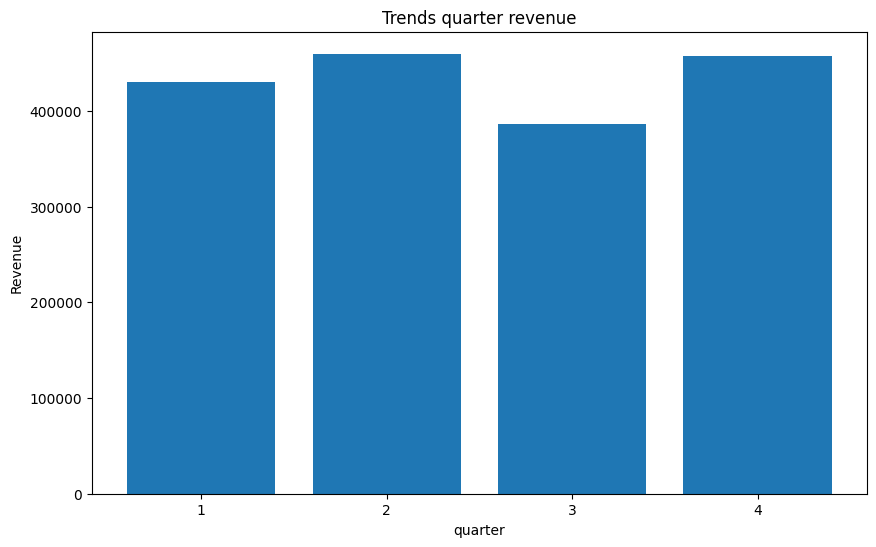

In [169]:
# Calculate proportion of each quarter
quarter_revenue=df_nz_sampled.groupby('quarter')['total_amount'].sum()
quarter_count=df_nz_sampled.quarter.value_counts().sort_index()
ind=quarter_count.index
val=quarter_count.values
val
plt.figure(figsize=(10,6))
plt.bar(ind,val)
plt.xlabel("quarter")
plt.ylabel("Revenue")
plt.title("Trends quarter revenue")
plt.xticks(range(1, 5))

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [177]:
df_nz_filter=df_nz_sampled[df_nz_sampled.trip_distance>0]
df_nz_filter

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month,quarter
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,3.00,0.0,1.0,18.00,2.5,0.0,23,Saturday,12,4
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.00,0.0,1.0,12.20,2.5,0.0,0,Sunday,1,1
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,3.05,0.0,1.0,15.25,2.5,0.0,0,Sunday,1,1
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,4.60,0.0,1.0,23.10,2.5,0.0,0,Sunday,1,1
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,4.68,0.0,1.0,28.08,2.5,0.0,0,Sunday,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831259,2,2023-09-30 23:34:59,2023-09-30 23:48:00,2.0,1.30,1.0,N,234,249,1,...,3.56,0.0,1.0,21.36,2.5,0.0,23,Saturday,9,3
1831260,2,2023-09-30 23:51:38,2023-09-30 23:53:08,1.0,0.46,1.0,N,239,238,2,...,0.00,0.0,1.0,9.40,2.5,0.0,23,Saturday,9,3
1831261,2,2023-09-30 23:14:40,2023-09-30 23:35:31,1.0,2.80,1.0,N,249,50,1,...,2.00,0.0,1.0,26.10,2.5,0.0,23,Saturday,9,3
1831262,2,2023-09-30 23:23:52,2023-09-30 23:50:41,1.0,5.68,1.0,N,164,256,1,...,6.78,0.0,1.0,40.68,2.5,0.0,23,Saturday,9,3


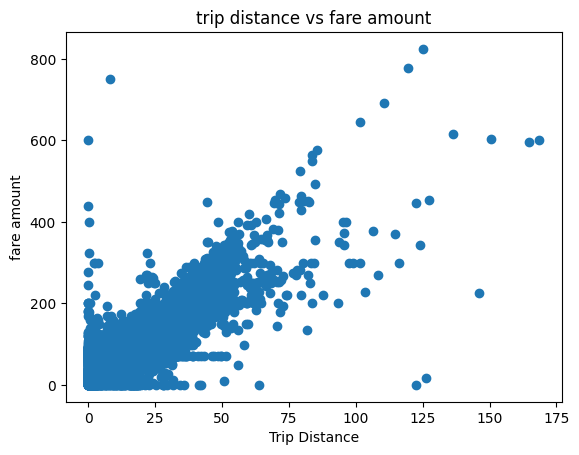

In [179]:
# Show how trip fare is affected by distance
plt.scatter(df_nz_filter.trip_distance,df_nz_filter.fare_amount)
plt.xlabel("Trip Distance")
plt.ylabel("fare amount")
plt.title("trip distance vs fare amount")
plt.show()

In [199]:
corr_t_f=df_nz_filter["trip_distance"].corr(df_nz_filter["fare_amount"])
print(f"correlation between trip distance and fare amount {corr_t_f}")

correlation between trip distance and fare amount 0.9521138097903948


In [203]:
df_nz_filter['trip_duration']=df_nz_filter.tpep_dropoff_datetime-df_nz_filter.tpep_pickup_datetime
df_nz_filter['trip_duration']=df_nz_filter["trip_duration"].dt.total_seconds()/60
df_nz_filter

C:\Users\Hardik\AppData\Local\Temp\ipykernel_4188\2837586774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz_filter['trip_duration']=df_nz_filter.tpep_dropoff_datetime-df_nz_filter.tpep_pickup_datetime
C:\Users\Hardik\AppData\Local\Temp\ipykernel_4188\2837586774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nz_filter['trip_duration']=df_nz_filter["trip_duration"].dt.total_seconds()/60


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,AirportFee,pickup_hour,day_of_week,month,quarter,trip_duration
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,0.0,1.0,18.00,2.5,0.0,23,Saturday,12,4,7.450000
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,0.0,1.0,12.20,2.5,0.0,0,Sunday,1,1,5.350000
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,0.0,1.0,15.25,2.5,0.0,0,Sunday,1,1,4.566667
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,0.0,1.0,23.10,2.5,0.0,0,Sunday,1,1,14.166667
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,0.0,1.0,28.08,2.5,0.0,0,Sunday,1,1,19.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831259,2,2023-09-30 23:34:59,2023-09-30 23:48:00,2.0,1.30,1.0,N,234,249,1,...,0.0,1.0,21.36,2.5,0.0,23,Saturday,9,3,13.016667
1831260,2,2023-09-30 23:51:38,2023-09-30 23:53:08,1.0,0.46,1.0,N,239,238,2,...,0.0,1.0,9.40,2.5,0.0,23,Saturday,9,3,1.500000
1831261,2,2023-09-30 23:14:40,2023-09-30 23:35:31,1.0,2.80,1.0,N,249,50,1,...,0.0,1.0,26.10,2.5,0.0,23,Saturday,9,3,20.850000
1831262,2,2023-09-30 23:23:52,2023-09-30 23:50:41,1.0,5.68,1.0,N,164,256,1,...,0.0,1.0,40.68,2.5,0.0,23,Saturday,9,3,26.816667


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

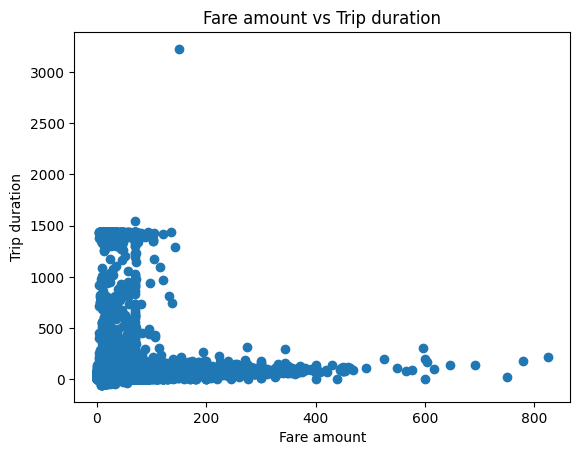

In [205]:
# Show relationship between fare and trip duration
plt.scatter(df_nz_filter.fare_amount,df_nz_filter.trip_duration)
plt.xlabel("Fare amount")
plt.ylabel("Trip duration")
plt.title("Fare amount vs Trip duration")
plt.show()

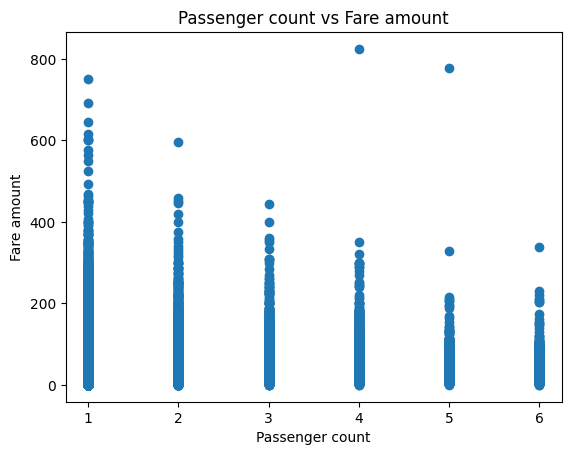

In [207]:
# Show relationship between fare and number of passengers
plt.scatter(df_nz_filter.passenger_count,df_nz_filter.fare_amount)
plt.xlabel("Passenger count")
plt.ylabel("Fare amount")
plt.title("Passenger count vs Fare amount")
plt.show()


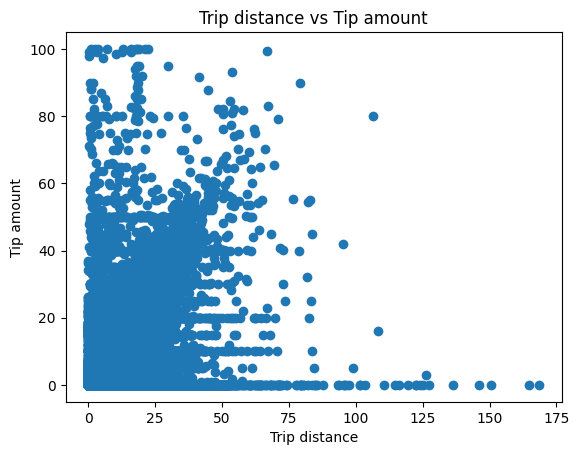

In [209]:
# Show relationship between tip and trip distance
plt.scatter(df_nz_filter.trip_distance,df_nz_filter.tip_amount)
plt.xlabel("Trip distance")
plt.ylabel("Tip amount")
plt.title("Trip distance vs Tip amount")
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [213]:
# Analyse the distribution of different payment types (payment_type).
df_nz_filter.payment_type.value_counts()



payment_type
1    1418684
2     290267
4      10535
3       5607
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [219]:
!pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.8/16.2 MB 4.6 MB/s eta 0:00:04
   ------ --------------------------------- 2.6/16.2 MB 4.3 MB/s eta 0:00:04
   -------- ------------------------------- 3.4/16.2 MB 4.1 MB/s eta 0:00:04
   ----------- ---------------------------- 4.5/16.2 MB 4.1 MB/s eta 0:00:03
   ------------ --------------------------- 5.2/16.2 MB 4.0 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.2 MB 4.0 MB/s eta 0:00:03
   --------------- ------------------------ 6.3/16.2 MB 4.0 MB/s eta 0:00:03
   ------------------ --------------------- 7.6/16.2 MB 4.0 MB/s eta 0:00:03
   -------------------- ------------------- 8.4/16.2 MB 4.0 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.2 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.2 MB 4.0 MB/s eta 0:00:02
   --

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [225]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("C:\\Users\\Hardik\\Documents\\nyctaxi\\taxi_zones\\taxi_zones.shp")# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

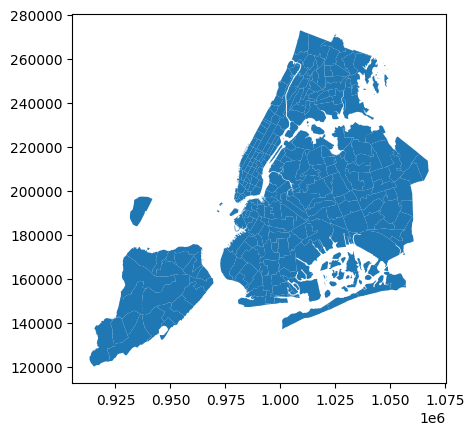

In [227]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [237]:
# Merge zones and trip records using locationID and PULocationID
df_merged=pd.merge(df_nz_filter,zones,left_on="PULocationID",right_on="LocationID")
df_merged

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,12,4,7.450000,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21..."
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,1,1,5.350000,144,0.027620,0.000047,Little Italy/NoLiTa,144,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,1,1,4.566667,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,1,1,14.166667,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,1,1,19.316667,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721656,2,2023-09-30 23:34:59,2023-09-30 23:48:00,2.0,1.30,1.0,N,234,249,1,...,9,3,13.016667,234,0.036072,0.000073,Union Sq,234,Manhattan,"POLYGON ((987029.847 207022.299, 987048.27 206..."
1721657,2,2023-09-30 23:51:38,2023-09-30 23:53:08,1.0,0.46,1.0,N,239,238,2,...,9,3,1.500000,239,0.063626,0.000205,Upper West Side South,239,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1721658,2,2023-09-30 23:14:40,2023-09-30 23:35:31,1.0,2.80,1.0,N,249,50,1,...,9,3,20.850000,249,0.036384,0.000072,West Village,249,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."
1721659,2,2023-09-30 23:23:52,2023-09-30 23:50:41,1.0,5.68,1.0,N,164,256,1,...,9,3,26.816667,164,0.035772,0.000056,Midtown South,164,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [303]:
# Group data by location and calculate the number of trips
df_merged_grouped=df_merged.groupby("LocationID").size()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [305]:
# Merge trip counts back to the zones GeoDataFrame
zones_merged=zones.merge(df_merged_grouped.rename('Tripcount'),left_index=True,right_index=True)
zones_merged



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,Tripcount
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",21
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",2
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",28
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",1751
5,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,"POLYGON ((966568.747 158679.855, 966615.256 15...",20
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",43
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",42
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",277
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",9234


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [307]:
# Find routes which have the slowest speeds at different times of the day
df_merged['speed']=df_merged['trip_distance']/df_merged['trip_duration']
df_merged

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,speed
0,2,2022-12-31 23:36:04,2022-12-31 23:43:31,1.0,1.69,1.0,N,43,141,1,...,4,7.450000,43,0.099739,0.000380,Central Park,43,Manhattan,"POLYGON ((991852.973 217950.807, 991725.244 21...",0.226846
1,2,2023-01-01 00:18:34,2023-01-01 00:23:55,1.0,0.99,1.0,N,144,211,2,...,1,5.350000,144,0.027620,0.000047,Little Italy/NoLiTa,144,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200...",0.185047
2,2,2023-01-01 00:32:27,2023-01-01 00:37:01,2.0,0.92,1.0,N,79,107,1,...,1,4.566667,79,0.042625,0.000108,East Village,79,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20...",0.201460
3,1,2023-01-01 00:26:11,2023-01-01 00:40:21,2.0,2.30,1.0,Y,48,238,1,...,1,14.166667,48,0.043747,0.000094,Clinton East,48,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",0.162353
4,2,2023-01-01 00:10:09,2023-01-01 00:29:28,1.0,2.27,1.0,N,68,137,1,...,1,19.316667,68,0.049337,0.000111,East Chelsea,68,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20...",0.117515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721656,2,2023-09-30 23:34:59,2023-09-30 23:48:00,2.0,1.30,1.0,N,234,249,1,...,3,13.016667,234,0.036072,0.000073,Union Sq,234,Manhattan,"POLYGON ((987029.847 207022.299, 987048.27 206...",0.099872
1721657,2,2023-09-30 23:51:38,2023-09-30 23:53:08,1.0,0.46,1.0,N,239,238,2,...,3,1.500000,239,0.063626,0.000205,Upper West Side South,239,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",0.306667
1721658,2,2023-09-30 23:14:40,2023-09-30 23:35:31,1.0,2.80,1.0,N,249,50,1,...,3,20.850000,249,0.036384,0.000072,West Village,249,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20...",0.134293
1721659,2,2023-09-30 23:23:52,2023-09-30 23:50:41,1.0,5.68,1.0,N,164,256,1,...,3,26.816667,164,0.035772,0.000056,Midtown South,164,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21...",0.211809


In [321]:
slow_route = df_merged.groupby(["PULocationID", "DOLocationID", "pickup_hour"])["trip_duration"].mean().reset_index()
slow_route = slow_route.sort_values(by="trip_duration", ascending=False)
slow_route.head()

,PULocationID,DOLocationID,pickup_hour,trip_duration
23643,76,1,13,1439.583333
28761,88,100,20,1439.400000
115314,246,202,18,1439.066667
69761,158,72,20,1438.533333
103949,234,53,3,1438.316667


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

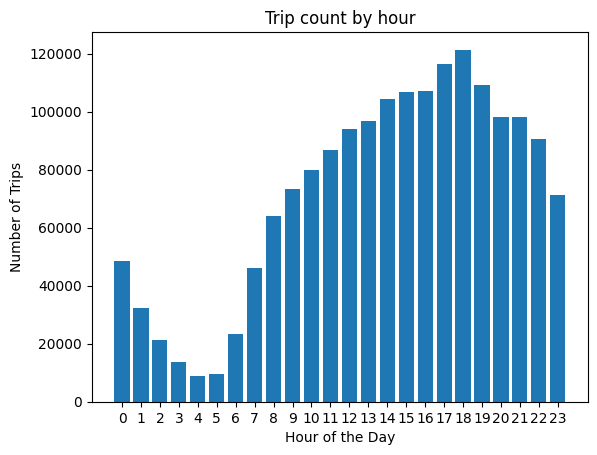

In [323]:
# Visualise the number of trips per hour and find the busiest hour
hour_counts = df_merged["pickup_hour"].value_counts().sort_index()

# Plot bar chart
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Trip count by hour")
plt.xticks(range(0, 24))  # Ensures all 24 hours are displayed
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [329]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
# Scale up the number of trips
hour_trip_actual = hour_counts/sample_fraction
hour_trip_actual

pickup_hour
0      970660.0
1      647600.0
2      423500.0
3      274240.0
4      174980.0
5      188820.0
6      465640.0
7      920380.0
8     1279640.0
9     1468040.0
10    1600660.0
11    1738100.0
12    1881100.0
13    1938100.0
14    2085560.0
15    2136280.0
16    2139320.0
17    2326040.0
18    2426620.0
19    2186320.0
20    1964020.0
21    1962000.0
22    1812100.0
23    1423500.0
Name: count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

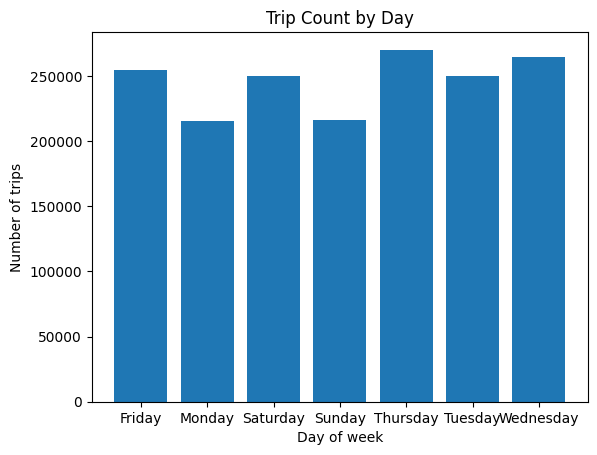

In [335]:
# Compare traffic trends for the week days and weekends
df_merged.columns
day_count = df_merged["day_of_week"].value_counts().sort_index()

# Plot bar chart
plt.bar(day_count.index, day_count.values)
plt.xlabel("Day of week")
plt.ylabel("Number of trips")
plt.title("Trip Count by Day")
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

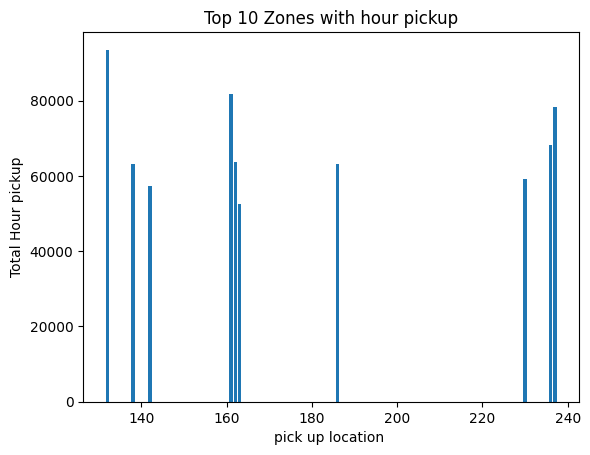

In [355]:
# Find top 10 pickup and dropoff zones
pick_zone=df_merged.groupby(['PULocationID','pickup_hour']).size().reset_index(name="trip_count")
top_10 = pick_zone.groupby("PULocationID")["trip_count"].sum().nlargest(10).reset_index()
top_10
plt.bar(top_10["PULocationID"], top_10["trip_count"])
plt.xlabel("pick up location ")
plt.ylabel("Total Hour pickup")
plt.title("Top 10 Zones with hour pickup")
plt.show()

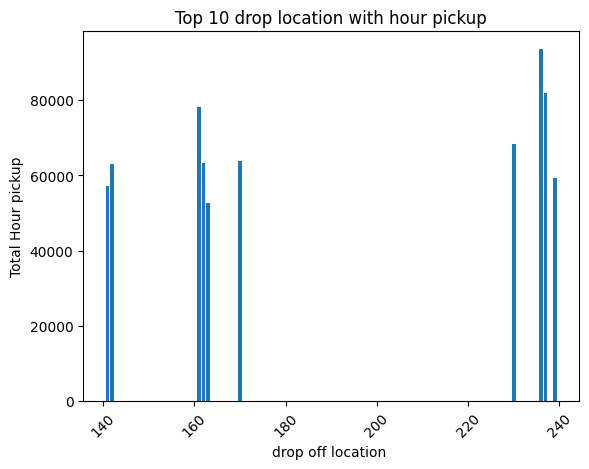

In [575]:
# Find top 10 pickup and dropoff zones
pick_zone_d=df_merged.groupby(['DOLocationID','pickup_hour']).size().reset_index(name="trip_count")
top_10_1 = pick_zone_d.groupby("DOLocationID")["trip_count"].sum().nlargest(10).reset_index()
top_10_1
plt.bar(top_10_1["DOLocationID"], top_10["trip_count"])
plt.xlabel("drop off location ")
plt.ylabel("Total Hour pickup")
plt.title("Top 10 drop location with hour pickup")
plt.xticks(rotation=45)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

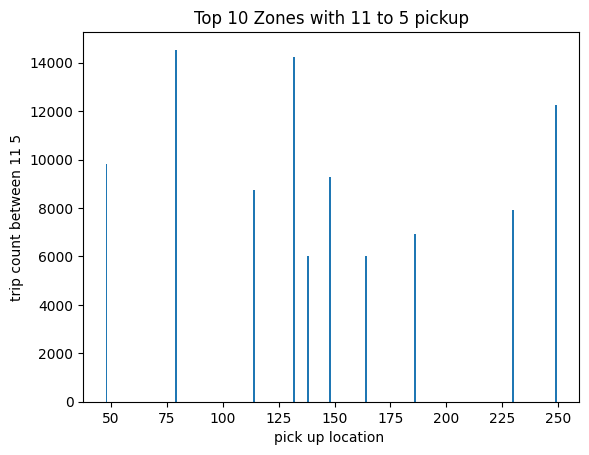

In [381]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
pick_zone=df_merged.groupby(['PULocationID','pickup_hour']).size().reset_index(name="trip_count")
pick_zone_11_5=pick_zone[(pick_zone.pickup_hour >= 23) | (pick_zone.pickup_hour <=5)]
pick_zone_11_5
top_10_11_5 = pick_zone_11_5.groupby("PULocationID")["trip_count"].sum().nlargest(10).reset_index()
top_10_11_5
plt.bar(top_10_11_5["PULocationID"], top_10_11_5["trip_count"])
plt.xlabel("pick up location ")
plt.ylabel("trip count between 11 5")
plt.title("Top 10 Zones with 11 to 5 pickup")
plt.show()

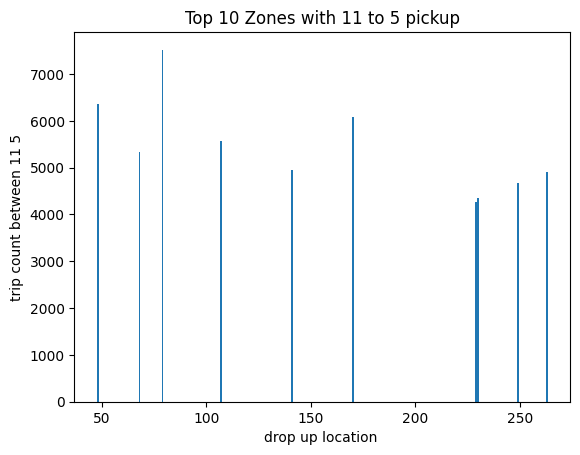

In [389]:
drop_zone=df_merged.groupby(['DOLocationID','pickup_hour']).size().reset_index(name="trip_count")
drop_zone_11_5=drop_zone[(drop_zone.pickup_hour >= 23) | (drop_zone.pickup_hour <=5)]
drop_zone_11_5
top_10_11_5 = drop_zone_11_5.groupby("DOLocationID")["trip_count"].sum().nlargest(10).reset_index()
top_10_11_5
plt.bar(top_10_11_5["DOLocationID"], top_10_11_5["trip_count"])
plt.xlabel("drop up location ")
plt.ylabel("trip count between 11 5")
plt.title("Top 10 Zones with 11 to 5 pickup")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

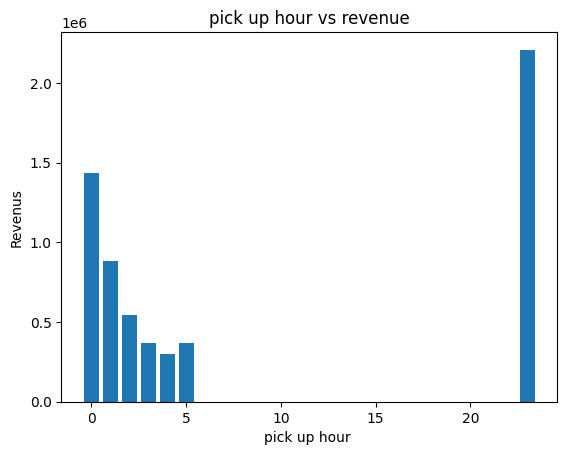

In [410]:
# Filter for night hours (11 PM to 5 AM)
df_merged.columns
hour_total_amount=df_merged.groupby('pickup_hour')['total_amount'].sum().reset_index(name="Revenue")
hour_total_amount
night_hour_data=hour_total_amount[(hour_total_amount.pickup_hour >= 23) | (hour_total_amount.pickup_hour <=5)]
night_hour_data
plt.bar(night_hour_data["pickup_hour"], night_hour_data["Revenue"])
plt.xlabel("pick up hour ")
plt.ylabel("Revenus")
plt.title("pick up hour vs revenue")
plt.show()

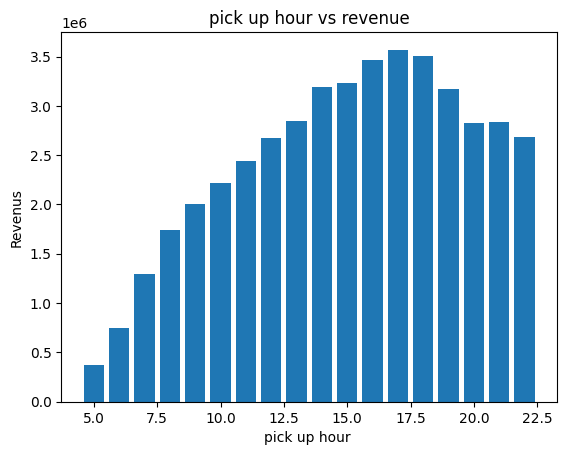

In [579]:
# Filter for day hours (5 am to 10 pm)
df_merged.columns
hour_total_amount_1=df_merged.groupby('pickup_hour')['total_amount'].sum().reset_index(name="Revenue")
hour_total_amount_1
day_hour_data=hour_total_amount_1[(hour_total_amount_1.pickup_hour >= 5) & (hour_total_amount.pickup_hour < 23)]
day_hour_data
plt.bar(day_hour_data["pickup_hour"], day_hour_data["Revenue"])
plt.xlabel("pick up hour ")
plt.ylabel("Revenus")
plt.title("pick up hour vs revenue")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [445]:
# Analyse the fare per mile per passenger for different passenger counts
df_merged.columns
df_merged_per_mile=df_merged.groupby('passenger_count')[['total_amount','trip_distance']].sum()
df_merged_per_mile.info()
df_merged_per_mile['average_fare_per_mile_per_passenger'] = (df_merged_per_mile['total_amount']/df_merged_per_mile['trip_distance'])/df_merged_per_mile.index
df_merged_per_mile

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1.0 to 6.0
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_amount   6 non-null      float64
 1   trip_distance  6 non-null      float64
dtypes: float64(2)
memory usage: 144.0 bytes


,total_amount,trip_distance,average_fare_per_mile_per_passenger
passenger_count,,,
1.0,37738751.27,4550326.03,8.293637
2.0,8469516.16,1108541.05,3.820118
3.0,2067770.30,264068.31,2.610146
4.0,1212778.47,159207.40,1.904400
5.0,657525.96,80506.64,1.633470
6.0,426136.12,51855.65,1.369623


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [451]:
# Compare the average fare per mile for different days and for different times of the day
df_merged.columns
df_merged_per_h=df_merged.groupby('pickup_hour')[['total_amount','trip_distance']].sum()
df_merged_per_h.info()
df_merged_per_h['average_fare_per_mile_per_hour'] = df_merged_per_h['total_amount']/df_merged_per_h['trip_distance']
df_merged_per_h

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_amount   24 non-null     float64
 1   trip_distance  24 non-null     float64
dtypes: float64(2)
memory usage: 480.0 bytes


,total_amount,trip_distance,average_fare_per_mile_per_hour
pickup_hour,,,
0,1435870.37,197516.52,7.269622
1,880112.24,118195.07,7.446269
2,544517.49,71557.46,7.609514
3,371436.53,50809.45,7.310383
4,297383.58,45241.62,6.573230
5,370675.74,60345.94,6.142513
6,751786.22,118266.65,6.356705
7,1297227.67,178283.98,7.276188
8,1743223.08,216470.33,8.052942


In [453]:
# Compare the average fare per mile for different days and for different times of the day
df_merged.columns
df_merged_per_d=df_merged.groupby('day_of_week')[['total_amount','trip_distance']].sum()
df_merged_per_d.info()
df_merged_per_d['average_fare_per_mile_per_day'] = (df_merged_per_d['total_amount']/df_merged_per_d['trip_distance'])
df_merged_per_d

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Friday to Wednesday
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_amount   7 non-null      float64
 1   trip_distance  7 non-null      float64
dtypes: float64(2)
memory usage: 168.0+ bytes


,total_amount,trip_distance,average_fare_per_mile_per_day
day_of_week,,,
Friday,7490020.34,903226.17,8.292519
Monday,6557886.00,847971.03,7.733620
Saturday,6862089.34,849233.53,8.080333
Sunday,6494967.83,881589.86,7.367335
Thursday,8023761.09,942641.13,8.512000
Tuesday,7358707.43,877732.29,8.383772
Wednesday,7785046.25,912111.07,8.535195


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [457]:
# Compare fare per mile for different vendors
df_merged.columns
df_merged_per_v=df_merged.groupby('VendorID')[['total_amount','trip_distance']].sum()
df_merged_per_v.info()
df_merged_per_v['average_fare_per_mile_per_vendor'] = (df_merged_per_v['total_amount']/df_merged_per_v['trip_distance'])
df_merged_per_v


<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 1 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_amount   2 non-null      float64
 1   trip_distance  2 non-null      float64
dtypes: float64(2)
memory usage: 48.0 bytes


,total_amount,trip_distance,average_fare_per_mile_per_vendor
VendorID,,,
1,12459621.75,1521797.60,8.187437
2,38112856.53,4692707.48,8.121720


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [467]:
# Defining distance tiers
df_merged_v_t_t=df_merged.groupby(['VendorID','trip_distance'])['total_amount'].sum().reset_index(name="totalamount")
df_merged_v_t_t
df_merged_v_t_t['average_fare']=df_merged_v_t_t['totalamount']/df_merged_v_t_t['trip_distance']
df_merged_v_t_t

,VendorID,trip_distance,totalamount,average_fare
0,1,0.10,5863.65,58636.500000
1,1,0.20,11761.31,58806.550000
2,1,0.30,31720.56,105735.200000
3,1,0.40,69081.33,172703.325000
4,1,0.50,116980.79,233961.580000
...,...,...,...,...
4513,2,136.48,627.59,4.598403
4514,2,146.09,226.00,1.546992
4515,2,150.70,606.85,4.026875
4516,2,164.66,610.35,3.706729


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [487]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_merged.columns
#df_merged.groupby(['trip_distance','passenger_count','tpep_pickup_datetime'])['tip_amount'].sum()
df_merged_t_t=df_merged.groupby('trip_distance')['tip_amount'].sum().reset_index(name="tipamount")
df_merged_t_t
df_merged_t_t['avg_tip_trip']=df_merged_t_t['tipamount']/df_merged_t_t['trip_distance']
df_merged_t_t

,trip_distance,tipamount,avg_tip_trip
0,0.01,624.26,62426.000000
1,0.02,280.86,14043.000000
2,0.03,276.98,9232.666667
3,0.04,444.85,11121.250000
4,0.05,306.80,6136.000000
...,...,...,...
4142,136.48,0.00,0.000000
4143,146.09,0.00,0.000000
4144,150.70,0.00,0.000000
4145,164.66,0.00,0.000000


In [497]:
df_merged.columns
#df_merged.groupby(['trip_distance','passenger_count','tpep_pickup_datetime'])['tip_amount'].sum()
df_merged_p_t=df_merged.groupby('passenger_count')['tip_amount'].sum().reset_index(name="tipamount")
df_merged_p_t
df_merged_p_t['avg_tip_pass']=df_merged_p_t['tipamount']/df_merged_p_t['passenger_count']
df_merged_p_t

,passenger_count,tipamount,avg_tip_pass
0,1.0,4758359.27,4.758359e+06
1,2.0,1033042.28,5.165211e+05
2,3.0,240631.78,8.021059e+04
3,4.0,131665.55,3.291639e+04
4,5.0,83186.49,1.663730e+04
5,6.0,53443.64,8.907273e+03


In [503]:
df_merged.columns
df_merged_a_t=df_merged.groupby('tpep_pickup_datetime')['tip_amount'].sum().reset_index(name="tipamount")
df_merged_a_t

,tpep_pickup_datetime,tipamount
0,2022-12-31 23:36:04,3.00
1,2023-01-01 00:00:06,0.00
2,2023-01-01 00:02:19,12.00
3,2023-01-01 00:02:35,6.52
4,2023-01-01 00:03:01,0.72
...,...,...
1660771,2023-12-31 23:55:02,3.00
1660772,2023-12-31 23:55:20,0.00
1660773,2023-12-31 23:55:35,0.00
1660774,2023-12-31 23:55:45,15.24


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [505]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_merged.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'AirportFee', 'pickup_hour',
       'day_of_week', 'month', 'quarter', 'trip_duration', 'OBJECTID',
       'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry',
       'speed'],
      dtype='object')

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

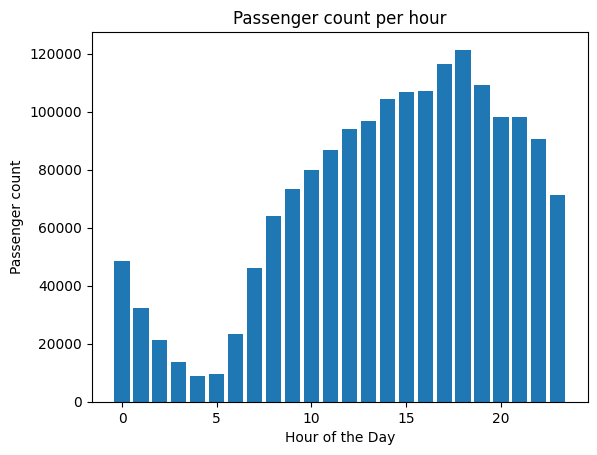

In [511]:
# See how passenger count varies across hours and days
df_merged_p_p=df_merged.groupby('pickup_hour')['passenger_count'].count().reset_index(name='passengercount')
df_merged_p_p
# Plot bar chart
plt.bar(df_merged_p_p.pickup_hour, df_merged_p_p.passengercount)
plt.xlabel("Hour of the Day")
plt.ylabel("Passenger count")
plt.title("Passenger count per hour")
#plt.xticks(range(0, 24))  # Ensures all 24 hours are displayed
plt.show()



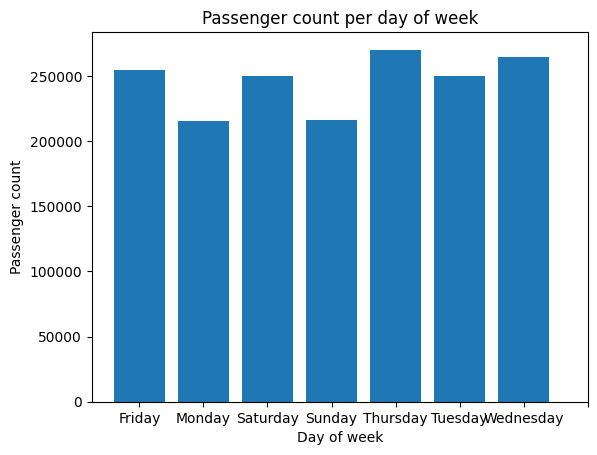

In [515]:
df_merged_d_p=df_merged.groupby('day_of_week')['passenger_count'].count().reset_index(name='passengercount')
df_merged_d_p
# Plot bar chart
plt.bar(df_merged_d_p.day_of_week, df_merged_d_p.passengercount)
plt.xlabel("Day of week")
plt.ylabel("Passenger count")
plt.title("Passenger count per day of week")
plt.xticks(range(0, 8))  # Ensures all 24 hours are displayed
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [547]:
# How does passenger count vary across zones
df_merged_z_p=df_merged.groupby('PULocationID')['passenger_count'].sum().reset_index(name='totalpassengercount')
df_merged_z_p

,PULocationID,totalpassengercount
0,1,32.0
1,2,3.0
2,3,33.0
3,4,2518.0
4,5,20.0
...,...,...
246,259,44.0
247,260,356.0
248,261,14272.0
249,262,30213.0


In [559]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_merged.head()
zone_merge_new=zones_merged.groupby('zone')['Tripcount'].mean().reset_index(name='Avg_count_zone')
zone_merge_new

,zone,Avg_count_zone
0,Allerton/Pelham Gardens,2.0
1,Alphabet City,28.0
2,Arden Heights,1751.0
3,Arrochar/Fort Wadsworth,20.0
4,Astoria,4.0
...,...,...
244,Woodlawn/Wakefield,43.0
245,Woodside,42.0
246,World Trade Center,277.0
247,Yorkville East,9234.0


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [565]:
# How often is each surcharge applied?
df_merged.groupby('PULocationID')['congestion_surcharge'].count()


PULocationID
1         21
2          2
3         28
4       1751
5         20
       ...  
259       42
260      277
261     9234
262    22824
263    32737
Name: congestion_surcharge, Length: 251, dtype: int64

In [568]:
df_merged.groupby('PULocationID')['improvement_surcharge'].count()

PULocationID
1         21
2          2
3         28
4       1751
5         20
       ...  
259       42
260      277
261     9234
262    22824
263    32737
Name: improvement_surcharge, Length: 251, dtype: int64

In [570]:
df_merged.groupby('DOLocationID')['improvement_surcharge'].count()

DOLocationID
1       4932
2          1
3        134
4       6909
5         23
       ...  
261     8565
262    27185
263    35766
264     3988
265     7041
Name: improvement_surcharge, Length: 261, dtype: int64

In [572]:
df_merged.groupby('DOLocationID')['congestion_surcharge'].count()

DOLocationID
1       4932
2          1
3        134
4       6909
5         23
       ...  
261     8565
262    27185
263    35766
264     3988
265     7041
Name: congestion_surcharge, Length: 261, dtype: int64

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Check for hotspots so that taxi's take advantage of busy hour between 5-7 hours
2. Include dynamic pricing to increase revenue
3. Reduce response time to increase customer satisfaction
4. Forcasting, usage of taxi is more on Thursday and Wednesday compared to rest of day. We can forcast Area based usage.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Weekends vs Weekdays. On weekends focus more on malls, tourist places. On weekends focus on office areas
2. Avoid taxi positions on low demand areas.
3. Seasonal allocation , taxi allocation near residential and shopping areas based on season.
4. Position taxis near bus or subways to increase capitalization
5. During night focus on identified zone.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Offer discounts on non-peak hours to increase revenue.
2. Use real time analytics solution to avoid waiting time and avoid congestion
3. Seasonal adjustments during holidays or harsh weather when demand is high
4. Offer carpool sharing service to increase revenue
5. Offer loyality points to increase customer satisfaction and retain customer
6. Use machine learning to predict demand areas, this will help proactive dispatch of cabs
7. During night focus on identified zone to increase revenue.
8. As revenue is more on single passenger we can increase customer satisfaction for same to retain customers.